<a href="https://colab.research.google.com/github/KamilShape/emotion_recognition/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

In [ ]:
#Libraries
import os
import cv2
from google.colab.patches import cv2_imshow
import shutil
#----------------visualisation---------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#----------------keras-----------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import keras
#---------------PIL--------------------------
from PIL import Image

In [ ]:
data_path = 'drive/MyDrive/faces/data'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


*Dataset is quite balanced.*

# **2. Train and test set**

In [ ]:
train_path = 'drive/MyDrive/recognized_faces/train'

In [ ]:
test_path = 'drive/MyDrive/recognized_faces/test'

In [ ]:
faces_path = 'drive/MyDrive/recognized_faces'

In [ ]:
faces_folder = os.listdir('drive/MyDrive/recognized_faces')

In [ ]:
faces = ['happiness', 'sadness', 'anger' ]

In [ ]:
amount = []

for k in faces:
  amount.append(len(os.listdir(f'drive/MyDrive/recognized_faces/{k}')))

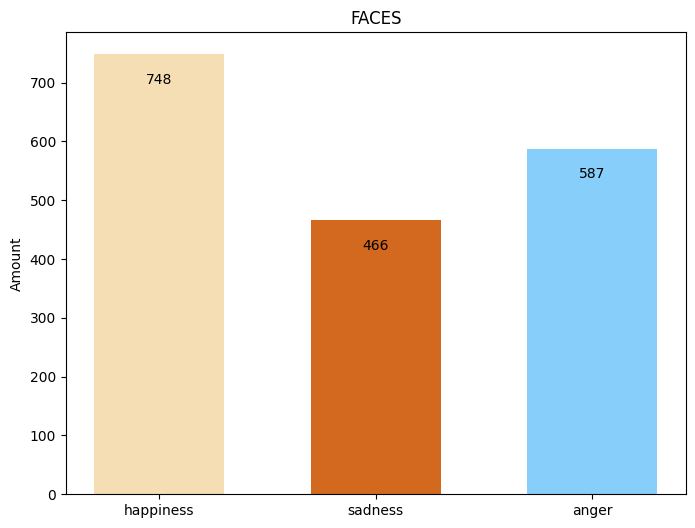

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
colors = ['wheat', 'chocolate', 'lightskyblue','teal', 'gold']
ax.bar(faces, amount, color=colors, width=0.6)
ax.set_title('FACES')
ax.set_ylabel('Amount')

for i in range(0, len(faces)):
  ax.text(faces[i], amount[i] - 50, horizontalalignment='center', s=amount[i] )

In [ ]:
def create_set(faces, path, new_path, set_size):
  for face in faces:
    files_folder = os.listdir(f'{path}/{face}')
    for n in range(0, round(len(files_folder)*set_size)):
      files_folder = os.listdir(f'{path}/{face}')
      photo_number = np.random.randint(len(files_folder))
      os.makedirs(f'{new_path}/{face}', exist_ok=True)
      os.replace(f'{path}/{face}/{files_folder[photo_number]}', f'{new_path}/{face}/{files_folder[photo_number]}')

In [ ]:
#creating train set
create_set(faces, faces_path, train_path, 0.8)

In [ ]:
#creating test set
create_set(faces, faces_path, test_path, 1)

In [22]:
img_height = 128
img_width = 128
batch_size = 10

In [23]:
train_ds = keras.utils.image_dataset_from_directory(
    train_path,
    validation_split = 0.2,
    seed=0,
    subset='training',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = 'categorical')

val_ds = keras.utils.image_dataset_from_directory(
    train_path,
    validation_split = 0.3,
    seed=0,
    subset='validation',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = 'categorical')

Found 1441 files belonging to 3 classes.
Using 1153 files for training.
Found 1441 files belonging to 3 classes.
Using 432 files for validation.


# **3. Model**

In [28]:
model = Sequential()
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(128, (1,1), padding='same', activation='relu'))
model.add(layers.MaxPool2D((2,2)))
# model.add(layers.RandomRotation(factor = (-1, 1), fill_mode='reflect', interpolation='bilinear',))

model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))

In [30]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    batch_size = batch_size)

Epoch 1/100
